In [16]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/adamaskari/Downloads/data_house.csv.zip')
df = df.drop(['yr_renovated', 'long', 'lat', 'date', 'Unnamed: 0', 'id'], axis=1)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,1800,7503


In [17]:
df['mean_zipcode_price'] = df.groupby('zipcode')['price'].transform('mean')
print(df)

          price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      221900.0         3       1.00         1180      5650     1.0   
1      538000.0         3       2.25         2570      7242     2.0   
2      180000.0         2       1.00          770     10000     1.0   
3      604000.0         4       3.00         1960      5000     1.0   
4      510000.0         3       2.00         1680      8080     1.0   
...         ...       ...        ...          ...       ...     ...   
21608  360000.0         3       2.50         1530      1131     3.0   
21609  400000.0         4       2.50         2310      5813     2.0   
21610  402101.0         2       0.75         1020      1350     2.0   
21611  400000.0         3       2.50         1600      2388     2.0   
21612  325000.0         2       0.75         1020      1076     2.0   

       waterfront  view  condition  grade  sqft_above  sqft_basement  \
0               0     0          3      7        1180              0   
1  

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   price               21613 non-null  float64
 1   bedrooms            21613 non-null  int64  
 2   bathrooms           21613 non-null  float64
 3   sqft_living         21613 non-null  int64  
 4   sqft_lot            21613 non-null  int64  
 5   floors              21613 non-null  float64
 6   waterfront          21613 non-null  int64  
 7   view                21613 non-null  int64  
 8   condition           21613 non-null  int64  
 9   grade               21613 non-null  int64  
 10  sqft_above          21613 non-null  int64  
 11  sqft_basement       21613 non-null  int64  
 12  yr_built            21613 non-null  int64  
 13  zipcode             21613 non-null  int64  
 14  sqft_living15       21613 non-null  int64  
 15  sqft_lot15          21613 non-null  int64  
 16  mean

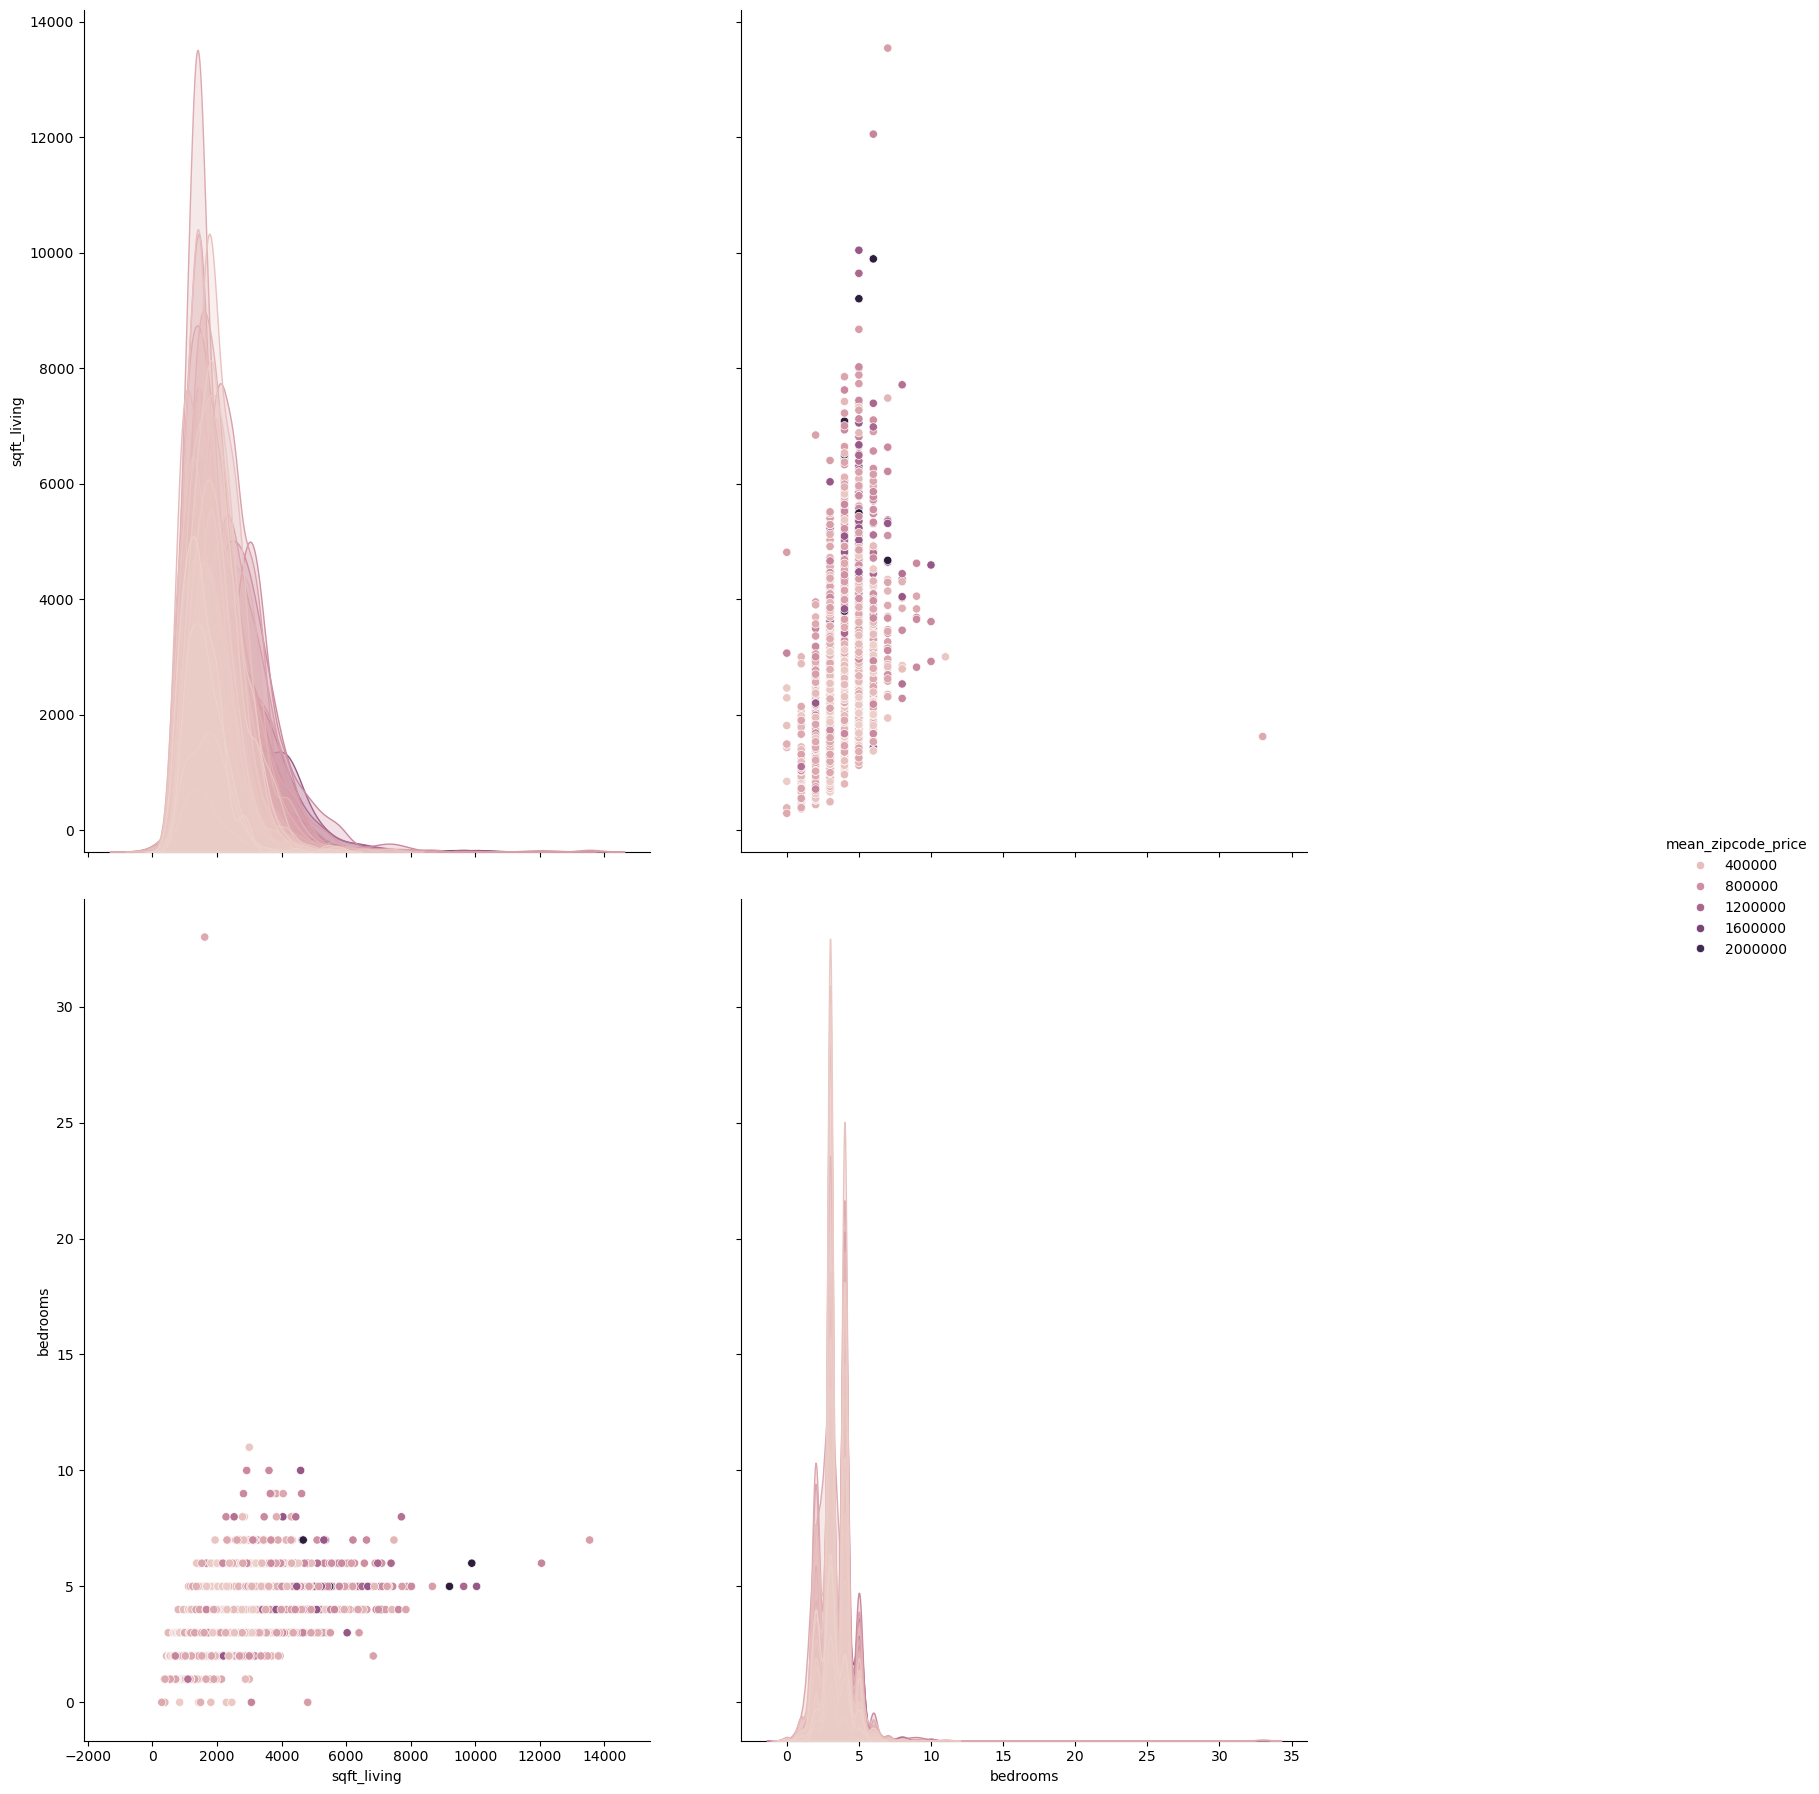

In [37]:
selected_columns = ["sqft_living", "mean_zipcode_price", "bedrooms"] 
g = sns.pairplot(df[selected_columns], hue="mean_zipcode_price")

g.fig.set_size_inches(20, 20)
plt.show()

In [38]:
features = df.drop(columns = ["mean_zipcode_price"])
target = df["mean_zipcode_price"]

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

In [42]:
X_train.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15
5268,495000.0,3,1.0,1570,5510,1.0,0,0,4,7,1070,500,1940,98115,1770,6380
16909,635000.0,3,2.5,1780,11000,1.0,0,0,4,8,1210,570,1980,98006,2310,9700
16123,382500.0,3,1.5,1090,9862,1.0,0,0,3,8,1090,0,1987,98074,1710,9862
12181,382500.0,4,2.5,2210,7079,2.0,0,0,3,8,2210,0,1993,98031,1970,7000
12617,670000.0,3,2.5,1800,4763,2.0,0,0,3,7,1240,560,1985,98119,1790,4763


In [43]:
y_train.head()

5268     619900.547170
16909    859684.779116
16123    685605.775510
12181    300539.890511
12617    849448.016304
Name: mean_zipcode_price, dtype: float64

In [45]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [48]:
pred = knn.predict(X_test)
pred

array([381571.8936302 , 763109.3411448 , 681198.7507033 , ...,
       460476.61235509, 352266.74037686, 695829.02906244], shape=(4323,))

In [49]:
y_test.values

array([469455.77073171, 810164.875     , 579053.41729323, ...,
       645231.45644599, 319581.39402985, 645507.37809187], shape=(4323,))

In [50]:
knn.score(X_test, y_test)

0.5027370978233224